#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 11
### Due: Monday, Apr 18th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Apr 18th.

---

## Problem 1


This problem has to do with density estimation and clustering. 

1. Read in `hw11_data.npy`. The dataset should consist of $1000$ samples with $2$ features. Note that the last column are the labels, not another feature. Make a $2$-D scatter plot of the data colored by their labels. 


2. Start with kernel density estimation on the data set. First, perform a grid search $5$-fold cross-validation to find the best bandwidth, testing $30$ bandwidths between $0.1$ and $1.0$. What is this best bandwidth? Using this best bandwidth, plot the two-dimensional kernel density estimate of the distribution. 


3. Now try a nearest neighbors approach to estimating the density. Use the Bayesian nearest neighbors option. Plot the estimated distribution. What value of $k$ neighbors do you need to make the plot look similar to your KDE distribution?


### Solution

In [13]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [6]:
data = np.load("hw11_data.npy")

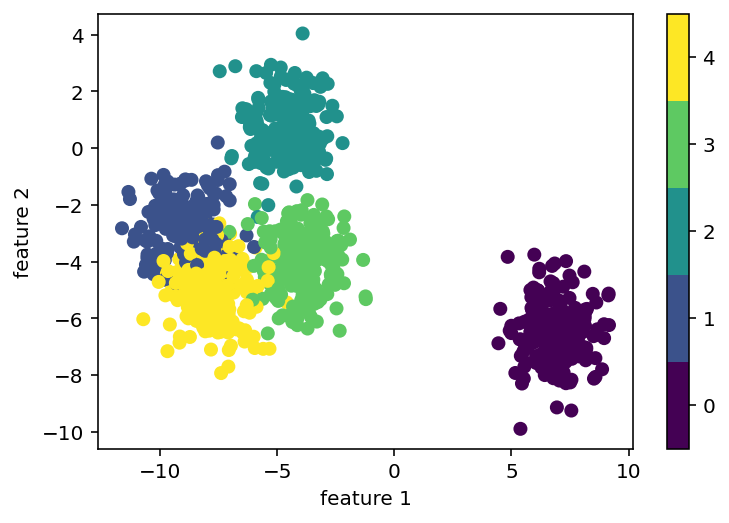

In [25]:
plt.scatter(data[:, 0], data[:, 1], 
            c=data[:,2], cmap=plt.cm.get_cmap('viridis', 5))

#plt.colorbar(ticks=[0, 1, 2], format=formatter)
cbar = plt.colorbar(ticks=[0, 1, 2, 3, 4])
cbar.ax.set_yticklabels(['0','1','2','3','4'])
plt.clim(-0.5, 4.5)
plt.xlabel("feature 1")
plt.ylabel("feature 2");

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity, NearestNeighbors

X = np.array([data[:,0], data[:,1]]).T
y = data[:,2]

bandwidths = np.linspace(0.1,1,30)
grid = GridSearchCV(KernelDensity(), {'bandwidth': bandwidths})
grid.fit(X, y)

print(grid.best_estimator_)
best_band = grid.best_estimator_.bandwidth

KernelDensity(algorithm='auto', atol=0, bandwidth=0.4724137931034482,
              breadth_first=True, kernel='gaussian', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)


Best bandwidth is 0.4724137931034482

Looked at scikit-learn documentation, and a few stackexchange threads to solve errors I was getting.

In [100]:
x1_range, x2_range = np.meshgrid(np.linspace(data[:,0].min(),data[:,0].max(),100), 
                                 np.linspace(data[:,1].min(),data[:,1].max(),100))
x12_sample = np.vstack([x1_range.flatten(), x2_range.flatten()]).T

kde = KernelDensity(kernel='gaussian', bandwidth=best_band).fit(data[:,0:2])
z = np.reshape(np.exp(kde.score_samples(x12_sample)), x1_range.shape)

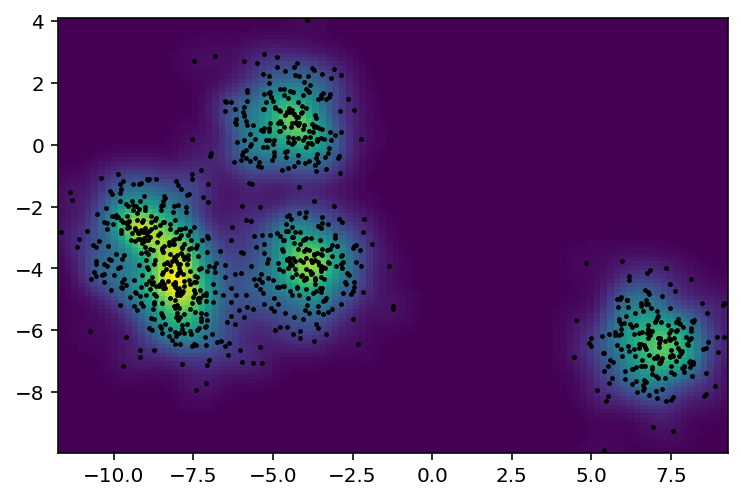

In [101]:
plt.pcolormesh(x1_range, x2_range, z)
plt.scatter(data[:,0], data[:,1], s=2, facecolor='black')

In [108]:
from astroML.density_estimation import KNeighborsDensity

knn = KNeighborsDensity('bayesian', n_neighbors=50).fit(data[:,0:2])
z_knn = np.reshape(knn.eval(x12_sample), x1_range.shape)
print(z_knn)

[[0.30950155 0.32542881 0.34221193 ... 1.01309096 0.94688075 0.88231427]
 [0.32278832 0.3400258  0.35821128 ... 1.10277414 1.02595955 0.9512132 ]
 [0.3369256  0.35542119 0.37511043 ... 1.20351026 1.11387372 1.02661631]
 ...
 [0.23995902 0.25007168 0.26063375 ... 0.09841587 0.09750393 0.09652035]
 [0.23173411 0.24132247 0.25153716 ... 0.09550853 0.0946472  0.09371954]
 [0.22395941 0.23310443 0.24295794 ... 0.09272607 0.09191187 0.09103624]]


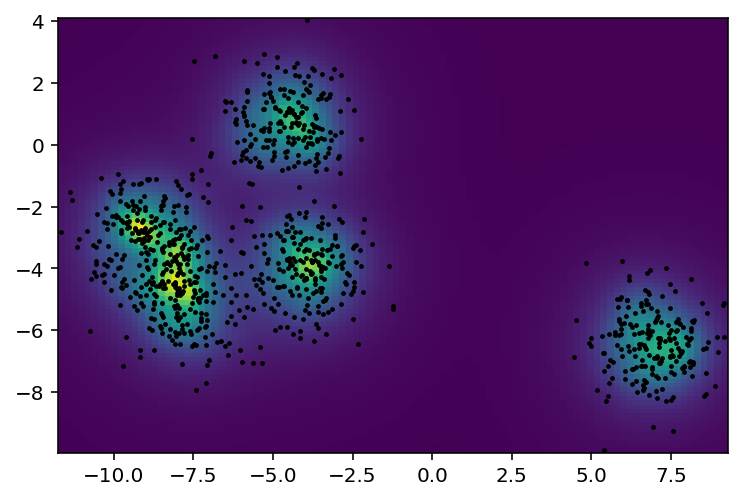

In [109]:
plt.pcolormesh(x1_range, x2_range, z_knn)
plt.scatter(data[:,0], data[:,1], s=2, facecolor='black')